In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
artists = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/artist_data.csv')
works = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/artwork_data.csv')

C:\Users\mebra.DESKTOP-L12LJA6\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0, 0.5, 'Artworks count')

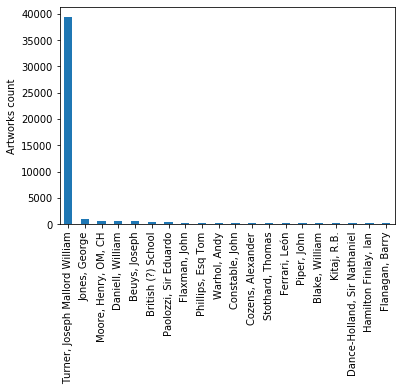

In [3]:
works.artist.value_counts().head(20).plot(kind='bar')
plt.ylabel("Artworks count")


Text(0, 0.5, 'Artworks Count')

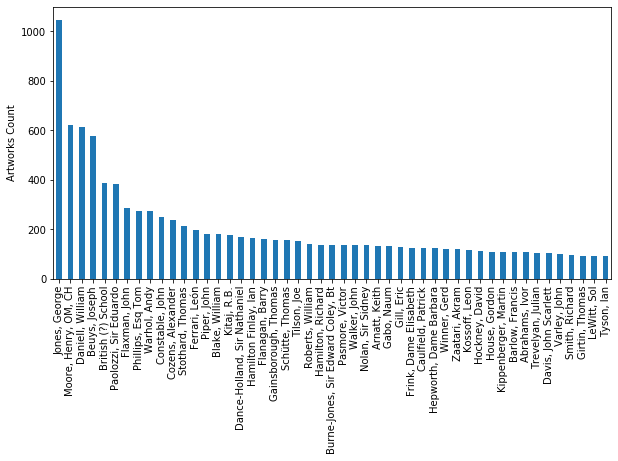

In [4]:
works.artist.value_counts().head(50)[1:51].plot(kind='bar', figsize=(10,5))
plt.ylabel("Artworks Count") 



In [5]:
len(artists)


3532

In [6]:
artists.head(2)

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...


In [7]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 9 columns):
id              3532 non-null int64
name            3532 non-null object
gender          3416 non-null object
dates           3470 non-null object
yearOfBirth     3472 non-null float64
yearOfDeath     2228 non-null float64
placeOfBirth    3040 non-null object
placeOfDeath    1453 non-null object
url             3532 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 248.4+ KB


In [8]:
artists.dropna(inplace=True)# remove na from the file

In [9]:
artists['country']= artists.placeOfBirth.apply(lambda x: x.strip().split(',')[-1]) # put in new column
print(artists.country)

1         United States
2         United States
3        United Kingdom
5              Yisra'el
10       United Kingdom
11       United Kingdom
15               Polska
16       United Kingdom
17       United Kingdom
18               Italia
19            Argentina
20              Schweiz
27          Deutschland
28          Deutschland
29        United States
32       United Kingdom
33       United Kingdom
36       United Kingdom
37       United Kingdom
38       United Kingdom
40       United Kingdom
41               France
42       United Kingdom
48       United Kingdom
50            Nederland
54        United States
56               Italia
57            Solothurn
66             Ukrayina
67       United Kingdom
             ...       
3453             Polska
3454        Deutschland
3457     United Kingdom
3459     United Kingdom
3461     United Kingdom
3463      United States
3465     United Kingdom
3466     United Kingdom
3470     United Kingdom
3472     United Kingdom
3473         Öst

In [10]:
artists.head(2)

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url,country
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...,United States
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...,United States


In [11]:
artists.country.value_counts()

 United Kingdom     741
 United States      103
 France              98
 Deutschland         63
 Italia              44
 Éire                31
 België              20
 Schweiz             19
 Nederland           18
 Rossiya             18
 Polska              17
 Australia           12
 Österreich          12
 España              10
 Ukrayina             9
 Canada               8
 Bharat               8
 Brasil               7
 România              7
 Sverige              5
 Ceská Republika      5
 Nihon                4
 Belarus              4
 New Zealand          4
Magyarország          4
 Argentina            4
 Magyarország         4
 Hrvatska             4
Bharat                3
 Cuba                 3
                   ... 
Braintree             1
Saint Hélier          1
 Norge                1
Egremont              1
España                1
United States         1
 South Africa         1
Hrvatska              1
Isle of Man           1
Plymouth              1
Ukrayina        

In [12]:
# ???i used these code below but get error for setting different color bar???

In [13]:
artists.head(2)

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url,country
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...,United States
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...,United States


In [18]:
import re # regulare expression
import string
import unicodedata

def preprocess(x):
    
    decoded = x.encode().decode() #delete all escape in string
    #decoded = bytes(x, "utf-8").decode("unicode_escape")
    #decoded = bytes(x).decode("unicode_escape")
    #text = unicode(decoded, 'utf8') 
    return unicodedata.normalize('NFKD', decoded).encode('ascii', 'ignore') #ignores the unencodable unicode from the result

artists['country']= artists['country'].apply(lambda x: preprocess(x) if(pd.notnull(x)) else x) #clean country base on preprocess


AttributeError: 'bytes' object has no attribute 'encode'

In [ ]:
sns.barplot(x= 'gender', y= 'yearOfBirth' , data=artists)  # y has to be numerical values, 
#but in this case countplot is better as we are counting values see below 
sns.barplot()

In [ ]:
sns.barplot(x= 'gender', y= 'yearOfBirth' , data=artists)  # y has to be numerical values, 
#but in this case countplot is better as we are counting values see below 
sns.barplot()

In [ ]:
sns.countplot(x='country', data=artists) 

In [ ]:
sns.countplot(x='gender', data=artists)

In [ ]:
sns.boxplot(x= 'gender', y= 'yearOfBirth' , data=artists)  # y has to be numerical values, but in this case countplot is better as we are counting values
sns.barplot() 

In [ ]:
artists.gender.value_counts()

In [ ]:
#???also i used these code below,for solution of decod but still error??? 

In [ ]:
artists.groupby('country').id.count().sort_values(ascending=False).head(20).plot(kind='bar')

In [ ]:
# Process data to create counts by country

# Split the place of birth on commas
locations = artists.placeOfBirth.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []
#print(locations)

In [ ]:
# Process countries and clean up text
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['country'])
print(countries) 

In [ ]:
# Create numeric counts
print(countries.count())
cntry_counts = pd.DataFrame(countries.country.value_counts())
print(cntry_counts.sum())


In [ ]:
other = int(cntry_counts[10:].sum())
print(other)

In [ ]:
cntry_counts = cntry_counts[:10]
#print(cntry_counts)
cntry_counts.loc[11]= other
#print(cntry_counts)
cntry_counts = cntry_counts.rename(index={11: 'Other'})
print(cntry_counts)

In [ ]:
cntry_counts=artists.groupby('country').id.count().sort_values(ascending=False).head(10)

In [ ]:
cntry_counts=pd.DataFrame(cntry_counts)

In [ ]:
cntry_counts.columns # give name column: id and type:object

In [ ]:
# Generate Pie Chart

plt.figure(figsize=(10,5))
colors = ['b', 'g', 'r', 'c', 'm', 'y','g', 'y', 'b', 'c']
labels=cntry_counts.index
plt.pie(cntry_counts.id, colors=colors, labels=labels, autopct='%.2f')
plt.axis('equal')#looks like circle
plt.title('Artists Country of Birth')
plt.legend(cntry_counts.index, title='countries')

In [ ]:
# it's auto filled but you can change the style 
from cycler import cycler #repeating the color
import matplotlib as mpl 
# mpl.rcParams['figure.facecolor'] = '0.75' # 75% lighter 
# mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk') #repeat this color

# plt.rcParams['patch.edgecolor'] = 'white' 

plt.figure(figsize=(10,5))

plt.pie(cntry_counts.id) 
plt.axis('equal')
plt.title('Artists Country of Birth')
plt.legend(cntry_counts.index, title='countries')
labels=['country']



In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
a=np.random.random(40) #make 40 number between 0,1
cs=cm.Set1(np.arange(40)/40.)# set1: create random color 
f=plt.figure()
ax=f.add_subplot(111, aspect='equal')# f:figure
p=plt.pie(a, colors=cs)
plt.show()

In [ ]:
plt.plot(artists.yearOfBirth.value_counts().sort_index())
plt.title('Artists Born by Year')

In [ ]:
acquisition_df = pd.DataFrame(works.acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')

In [ ]:
acquisition_df = pd.DataFrame(works[works.artist != 'Turner, Joseph Mallord William'].acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')

In [ ]:
living = pd.DataFrame(artists.yearOfDeath.isnull())
living = pd.DataFrame(living.yearOfDeath.value_counts())
living.plot(kind='bar', legend=False)
plt.title('Artists Who are No Longer Living')

In [ ]:
works.medium.value_counts().head(10)

In [ ]:
# Remove Turner
#turnerless_artworks = works[works.artist != 'Turner, Joseph Mallord William']
turnerless_artworks = works[works['artist'] != 'Turner, Joseph Mallord William']
#print(turnerless_artworks.head(2))

In [ ]:
# Coerce to Numeric
turnerless_artworks.height = pd.to_numeric(turnerless_artworks.height, errors = 'coerce')
turnerless_artworks.width = pd.to_numeric(turnerless_artworks.width, errors = 'coerce')
turnerless_artworks.depth = pd.to_numeric(turnerless_artworks.depth, errors = 'coerce')
turnerless_artworks = turnerless_artworks[turnerless_artworks['units']=='mm']
#turnerless_artworks = turnerless_artworks[turnerless_artworks.units == 'mm']
#print(turnerless_artworks.head(5))
turnerless_artworks = turnerless_artworks[turnerless_artworks.height.notnull()]
#print(turnerless_artworks)

## The error is just because of how we did the conditional select and we don't need to be worried about it...

In [ ]:
# Aggregate to new medium_agg column
turnerless_artworks['medium_agg'] = 'other'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paper", na=False),'medium_agg'] = 'paper'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("canvas", na=False),'medium_agg'] = 'canvas'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("wood", na=False),'medium_agg'] = 'wood'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paint on", na=False),'medium_agg'] = 'other painted panel'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Bronze", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Plaster", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Marble", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Stone", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("plate", na=False),'medium_agg'] = 'plate'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("photograph", na=False),'medium_agg'] = 'photo'

turnerless_artworks['surface'] = turnerless_artworks.height * turnerless_artworks.width
# if it's na you dont label it, ignore it 


In [ ]:
turnerless_artworks[['medium_agg','height','width','depth','surface']].groupby('medium_agg').describe()

In [ ]:
turnerless_artworks[['medium_agg', 'height']].boxplot(by='medium_agg', figsize=(10,20))

In [ ]:
sns.pairplot(artists, hue='country')

In [ ]:
# now let's look at top countries 
artists.country.value_counts().head(10)

In [ ]:
df=  artists[artists.country.isin(['United Kingdom', 'United States', 'France', 'Deutschland']) ]

In [ ]:
sns.pairplot(df, hue='country') #makes more sense! 

In [ ]:
df.head(2)

In [ ]:
df['year_lived']=df.yearOfDeath-df.yearOfBirth

In [ ]:
sns.barplot(x='gender', y='yearOfBirth', data=df)

In [ ]:
sns.barplot(x='gender', y='yearOfDeath', data=df) 

In [ ]:
sns.barplot(x='gender', y='year_lived', data=df) 

In [ ]:
sns.pairplot(df, hue='gender') #makes more sense! 